# El modelo *Integrate and Fire*

## Teoría

El modelo *Integrate and Fire* del comportamiento de una neurona viene descripto por dos ingredientes. En primer lugar, la ODE

\begin{eqnarray}
\frac{dV}{dt}
&=&
\frac{1}{\tau}
\left(
E-V(t)
+
RI(t)
\right)
\end{eqnarray}

donde:

* $V(t)$ representa el potencial de membrana al tiempo $t$,

* $E\approx -65mV$ representa el potencial de reposo,

* $\tau\approx 10ms$ representa el tiempo de relajación,

* $R\approx 10M\Omega$ representa una resistencia eléctrica, y

* $I(t)\approx 1nA$ representa una corriente/señal de entrada.

En segundo lugar, un mecanismo de disparo definido por

\begin{eqnarray}
V(t) \to E
\end{eqnarray}

cuando

\begin{eqnarray}
V(t) > V_u
\end{eqnarray}

donde:

* $V_u \approx -50mV$ representa un potencial umbral.

Es decir, según el mecanismo de disparo, el potencial de membrana $V(t)$ se resetea a su valor de reposo $E$ si supera cierto valor umbral $V_u$.

## Unidades

* p = pico = $10^{-12}$
* n = nano = $10^{-9}$
* $\mu$ = micro = $10^{-6}$
* m = mili = $10^{-3}$
* ...
* k = kilo = $10^{3}$
* M = Mega = $10^{6}$
* G = Giga = $10^{9}$
* T = Tera = $10^{12}$

### Ley de Ohm

Si $\Omega$ = Ohmio, V = Voltio y A = Amper, entonces

$$ 1\, Ohm = 1 \Omega = \frac{1 V}{1 A} $$

### Ley RC

Si s = segundos y F = Faradios, entonces

$$ 1 s = 1 \Omega \times 1 F $$

### Hertz

Si Hz = Hertz, luego

$$ 1 Hz = \frac{1}{1 s} $$

### Referencias

* https://technologystudent.com/elec1/ohm1.htm

* https://en.wikipedia.org/wiki/Biological_neuron_model#Leaky_integrate-and-fire

* https://compneuro.neuromatch.io/tutorials/W2D3_BiologicalNeuronModels/student/W2D3_Tutorial1.html



## **Ejercicio 1)** Importando librerías

**1)** Importe las librerías `numpy` para operar con arrays, `scipy` para utilizar rutinas de algebra lineal y `matplotlib.pyplot` para graficar.

**2)** Suba el archivo "libreria" `ode.py` que fabricó en el práctico 4), e impórtelo.

In [1]:
# 1.1)
import numpy as np
import scipy as sp
import scipy.linalg as linalg
import matplotlib.pyplot as plt

In [2]:
# 1.2)
import ode

## **Ejercicio 2)** Dinámica con mecanismo de disparo desactivado

En lo que sigue, se considera desactivado el mecanismo de disparo.

**1)** Resuelva analíticamente la ODE del modelo *Integrate and Fire* para una condición inicial arbitraria $V(0)=V_0$ y una corriente de entrada $I=0$.

**2)** Grafique la solución para $V_0=10mV$ y $t\in [0,100]ms$. Incorpore al gráfico una línea punteada indicando el potencial de reposo.

**3)** Realice un análisis geométrico de la solución calculada. Incorpore flechas del campo vectorial así como los puntos fijos estables, inestables y marginales, si los hubiere.

**4)** Repita **1)**, **2)** y **3)** para el caso de corriente de entrada constante, $I=2$nA.

### Extra

**5)** Resuelva analíticamente la ODE para una corriente de entrada $I:t\to I(t)$ arbitraria.

2.1)

La ecuación diferencial ordinaria (ODE) para el modelo Integrate and Fire es:

$\frac{dV}{dt} = \frac{1}{\tau} * (E - V(t) + R*I(t))$

Considerando I(t) = 0, integrando ambos lados de la ecuación y agrupando la constante de integración como una nueva constante 'A', obtenemos una solución de la forma:

$V(t) = E - A * e^{-t/\tau}$ o $V(t) = E + A * e^{-t/\tau}$

Ahora bien, particularizando para la condición inicial V(0) = V0, podemos obtener el valor de la constante A:

$A = E - V_0$ o $A = V_0 - E$

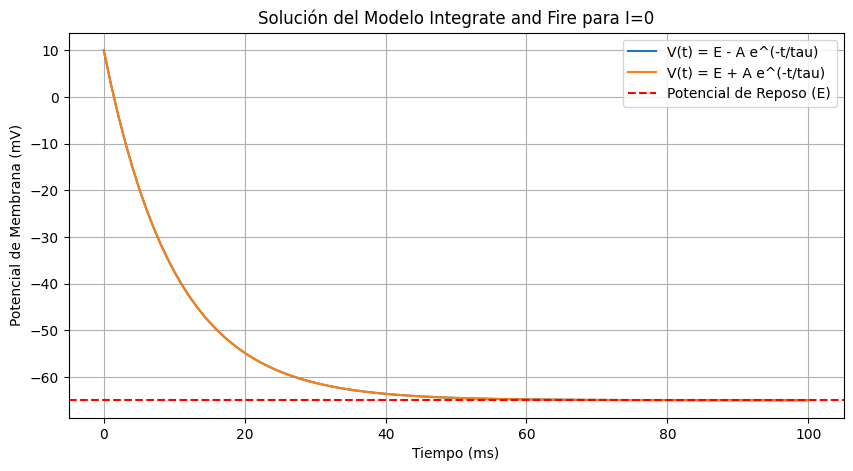

In [11]:
# 2.2)
import numpy as np
import matplotlib.pyplot as plt

# Parámetros
tau = 10  # Constante de tiempo de membrana (ms)
E = -65   # Potencial de reposo (mV)
V0 = 10     # Condición inicial (mV)
t = np.linspace(0, 100, 100)  # Intervalo de tiempo de 0 a 100 ms

# Soluciones generales
A1 = E - V0
V1 = E - A1 * np.exp(-t / tau)

A2 = V0 - E
V2 = E + A2 * np.exp(-t / tau)

# Gráfico
plt.figure(figsize=(10, 5))
plt.plot(t, V1, label='V(t) = E - A e^(-t/tau)')
plt.plot(t, V2, label='V(t) = E + A e^(-t/tau)')
plt.axhline(y=E, color='r', linestyle='--', label='Potencial de Reposo (E)')
plt.xlabel('Tiempo (ms)')
plt.ylabel('Potencial de Membrana (mV)')
plt.title('Solución del Modelo Integrate and Fire para I=0')
plt.legend()
plt.grid()
plt.show()

2.3)

Para realizar un análisis geométrico, se pueden trazar flechas del campo vectorial y encontrar los puntos fijos. En este caso, los puntos fijos corresponden a los valores de $V(t)$ donde la derivada $\frac{dV}{dt}$ es igual a cero. Para $I=0$, los puntos fijos se encuentran en $V(t) = E_L$.

2.4)

La ecuación diferencial ordinaria (ODE) para el modelo Integrate and Fire es:

$\frac{dV}{dt} = \frac{1}{\tau} * (E - V(t) + R*I(t))$

Considerando I(t) = 2[nA], integrando ambos lados de la ecuación y agrupando la constante de integración como una nueva constante 'A', obtenemos una solución de la forma:

$V(t) = E + R*I - A * e^{-t/\tau}$ o $V(t) = E + R*I + A * e^{-t/\tau}$

Ahora bien, particularizando para la condición inicial V(0) = V0, podemos obtener el valor de la constante A:

$A = E + R*I - V_0$ o $A = V_0 - E - R*I$

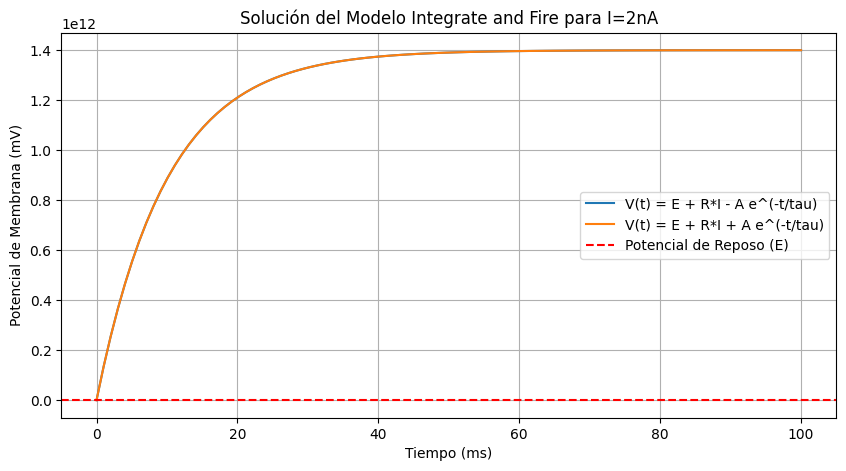

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros
tau = 10  # Constante de tiempo de membrana (ms)
E = -65   # Potencial de reposo (mV)
V0 = 10     # Condición inicial (mV)
t = np.linspace(0, 100, 100)  # Intervalo de tiempo de 0 a 100 ms
I = 2*10-6 # Corriente de entrada (mA)
R = 1*10e10 # Resistencia (mohms) == 10Mohms

# Soluciones generales
A1 = E + R*I - V0
V1 = E + R*I - A1 * np.exp(-t / tau)

A2 = V0 - E - R*I
V2 = E + R*I + A2 * np.exp(-t / tau)

# Gráfico
plt.figure(figsize=(10, 5))
plt.plot(t, V1, label='V(t) = E + R*I - A e^(-t/tau)')
plt.plot(t, V2, label='V(t) = E + R*I + A e^(-t/tau)')
plt.axhline(y=E, color='r', linestyle='--', label='Potencial de Reposo (E)')
plt.xlabel('Tiempo (ms)')
plt.ylabel('Potencial de Membrana (mV)')
plt.title('Solución del Modelo Integrate and Fire para I=2nA')
plt.legend()
plt.grid()
plt.show()

2.5)

Resolver esta ODE de manera analítica para una corriente de entrada arbitraria $I(t)$ puede ser complicado, ya que la solución depende específicamente de la forma funcional de $I(t)$. Para obtener una solución general, podemos separar variables y escribir la ODE de la siguiente manera:

$\frac{dV}{E - V(t) + R * I(t)} = \frac{dt}{\tau}$

Luego, podemos intentar integrar ambos lados de la ecuación, pero la dificultad radica en la forma funcional de $I(t)$, que puede variar ampliamente. En la práctica, la resolución analítica podría requerir métodos avanzados de integración, y la solución podría no estar disponible en forma cerrada para muchas formas arbitrarias de $I(t)$.

La solución más general en este caso podría involucrar técnicas numéricas, como la integración numérica o la simulación por computadora, para resolver la ODE de manera aproximada dada una función específica $I(t)$. Esto implicaría discretizar el tiempo y usar métodos numéricos, como el método de Euler o el método de Runge-Kutta, para calcular el potencial de membrana $V$ en intervalos de tiempo discretos.

## **Ejercicio 3)** Dinámica con mecanismo de disparo activado

**1)** Resuelva numéricamente la ODE del modelo *Integrate and Fire* en el intervalo $t\in [0,200]ms$ para la condición inicial $V(0)=E$ y una corriente de entrada $I(t)=I_0$ para todo $t$ con $I_0=2nA$. Utilice el paso de integración $h=0.05ms$.

**2)** Grafique la solución computada en el inciso **3.1)**. Incorpore al gráfico la solución exacta del inciso **2.1)**, en donde el mecanismo de disparo está desactivado, para la misma condición inicial del inciso **3.1)**. Grafique, también, líneas punteadas horizontales marcando los valores de $V^*$ y $V_u$, donde $V^*$ es el valor de $V$ tal que $f(V)=0$.

**3)** Para el caso indicado en el inciso **3.1)**, calcule analíticamente el período de disparo.
Observe si el valor computado corresponde con el observado en el inciso **3.2)**.
Grafíque la frencuencia en función de $I_0$.
Que ocurre para valores pequeños de $I_0$?


**4)** Repita **3.1)** y **3.2)** con $I_e(t)=I_0 \cos(t/30ms)$ e $I_0=2.5nA$ para $0\,ms\leq t\leq 500\,ms$. En este caso, no incluya la solución exacta del inciso **2.1)**, pero sí lineas punteadas horizontales para marcar los valores de $E$ y $V_u$.

**5)** Repita **3.1)** y **3.2)** con

\begin{equation}
I(t)= I_0 \, \left(
    \cos{\left( \frac{t}{3ms} \right)} +
    \sin{\left( \frac{t}{5ms} \right)} +
    \cos{\left( \frac{t}{7ms} \right)} +
    \sin{\left( \frac{t}{11ms} \right)} +
    \cos{\left( \frac{t}{13ms} \right)}  \right)^2 \, nA \,
    \;\;\;(4)
\end{equation}

e $I_0=0.35 nA$ para $0\,ms\leq t\leq 200\,ms$. Al igual que en inciso anterior, no incluya la solución exacta del inciso **2.a)**, pero sí lineas punteadas horizontales para marcar los valores de $E$ y $V_u$.

In [ ]:
# 3.1)